In [1]:
#importing required packages
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading the raw json file
data = []
with open('yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        data.append(json.loads(line))
        if i+1 >= 100000:
            break
#loading it into pandas dataframe
df = pd.DataFrame(data)
#display the dataframe
df.head() 

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [3]:
#examine the structure of the column attribute
df['attributes']

0        {'BusinessAcceptsCreditCards': 'True', 'BikePa...
1        {'GoodForKids': 'True', 'ByAppointmentOnly': '...
2                                                     None
3        {'BusinessAcceptsCreditCards': 'True', 'ByAppo...
4        {'BusinessAcceptsCreditCards': 'True', 'ByAppo...
                               ...                        
99995    {'RestaurantsDelivery': 'False', 'BYOBCorkage'...
99996                                                 None
99997    {'BikeParking': 'True', 'OutdoorSeating': 'Tru...
99998    {'GoodForKids': 'True', 'BusinessParking': '{'...
99999    {'Music': '{'dj': True, 'background_music': Fa...
Name: attributes, Length: 100000, dtype: object

In [4]:
with open('yelp_academic_dataset_business.json') as file:
    json_obj = [json.loads(line) for line in open('yelp_academic_dataset_business.json', 'r')]

# normalize the attribute column using json_normalize
df_attributes = json_normalize(json_obj,'attributes',['business_id'],errors='ignore')
df_attributes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,0,business_id
0,BusinessAcceptsCreditCards,f9NumwFMBDn751xgFiRbNA
1,BikeParking,f9NumwFMBDn751xgFiRbNA
2,GoodForKids,f9NumwFMBDn751xgFiRbNA
3,BusinessParking,f9NumwFMBDn751xgFiRbNA
4,ByAppointmentOnly,f9NumwFMBDn751xgFiRbNA
...,...,...
1403674,RestaurantsDelivery,SYa2j1boLF8DcGVOYfHPcA
1403675,NoiseLevel,SYa2j1boLF8DcGVOYfHPcA
1403676,OutdoorSeating,SYa2j1boLF8DcGVOYfHPcA
1403677,HasTV,SYa2j1boLF8DcGVOYfHPcA


In [5]:
#joining the df_attributes to df using business_id
df_merge = pd.merge(df, df_attributes, on='business_id')

In [6]:
#drop irrelevant columns
df_merge.drop(['attributes','hours'],axis=1,inplace=True)

In [7]:
#displaying all columns of the datafram
df_merge.columns

Index([ 'business_id',         'name',      'address',         'city',
              'state',  'postal_code',     'latitude',    'longitude',
              'stars', 'review_count',      'is_open',   'categories',
                    0],
      dtype='object')

In [8]:
#renaming the columns for better understanding
df_merge=df_merge.rename(columns = {0:'attributes'})

In [9]:
#display the datafram
df_merge.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,attributes
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",BusinessAcceptsCreditCards
1,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",BikeParking
2,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",GoodForKids
3,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",BusinessParking
4,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",ByAppointmentOnly


In [10]:
#checking for null values
df_merge.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
categories      1
attributes      0
dtype: int64

# Q1:Which Cities have the most reviews?

,city,review_count,Cum_review_count,Percent_reviews,Cum_Percent_reviews
0,Las Vegas,17844714,17844714,32.299419,32.299419
1,Phoenix,5490295,23335009,9.937584,42.237002
2,Toronto,3905363,27240372,7.068813,49.305816
3,Scottsdale,3548216,30788588,6.422368,55.728183
4,Charlotte,2855798,33644386,5.169072,60.897255


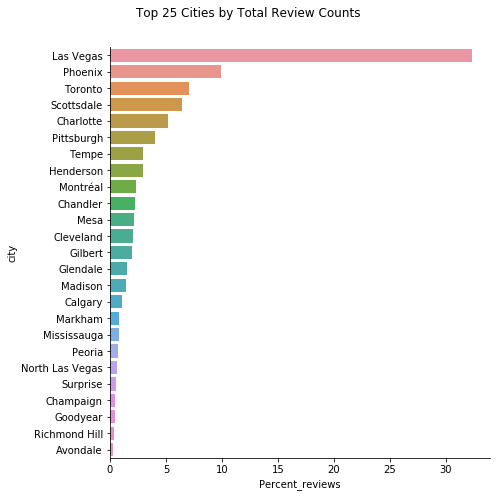

In [11]:
#lets also look at the reviews distribution by cities
#calucating the sum of review by each city
df_reviewsPerCity = pd.DataFrame(df_merge.groupby(['city'])['review_count'].sum().sort_values(ascending=False))
df_reviewsPerCity.reset_index(level=0, inplace=True) #reset index to column
#calculating the cumulative sum of reviews by city
df_reviewsPerCity['Cum_review_count'] = df_reviewsPerCity['review_count'].cumsum(axis = 0)
##calculating the percent of reviews by city
df_reviewsPerCity['Percent_reviews'] = (df_reviewsPerCity['review_count']/df_reviewsPerCity['review_count'].sum())*100.00
df_reviewsPerCity = df_reviewsPerCity.sort_values(['Percent_reviews'], ascending = 0)
df_reviewsPerCity = df_reviewsPerCity.reset_index(drop=True)
#calculating the cumulative percent of reviews by city
df_reviewsPerCity['Cum_Percent_reviews'] = df_reviewsPerCity['Percent_reviews'].cumsum(axis = 0)
#ploting the graph of top 25 cities by total reviews
ax = sns.catplot(x="Percent_reviews", y="city",kind="bar",data=df_reviewsPerCity.head(25), height = 7)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Top 25 Cities by Total Review Counts') # can also get the figure from plt.gcf()

df_reviewsPerCity= df_reviewsPerCity.head(5)
df_reviewsPerCity

In [12]:
export1 = df_reviewsPerCity.to_csv ('reviewsPerCity.csv', index= None, header=True)

# Q2:Which States have the most businesses?

,state,count of business
0,AZ,168505
1,ON,130106
2,NV,117540
3,OH,58696
4,NC,53091


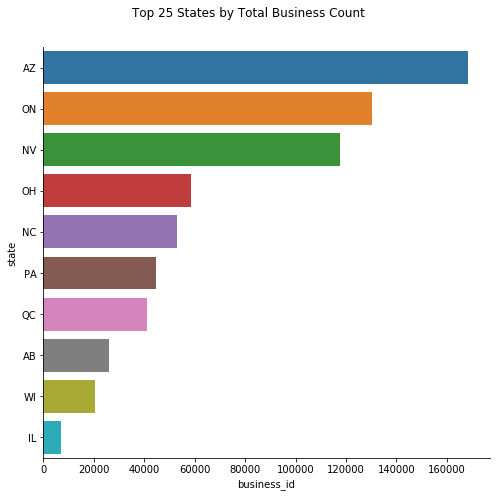

In [13]:
#calculating the count of businesses by state
df_BusinessPerState = pd.DataFrame(df_merge.groupby(['state'])['business_id'].count().sort_values(ascending=False))
df_BusinessPerState.reset_index(level=0, inplace=True) #reset index to column
#ploting graph to display top 10 states which has highest number of businesses
ax = sns.catplot(x="business_id", y="state",kind="bar",data=df_BusinessPerState.head(10), height = 7)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Top 25 States by Total Business Count') # can also get the figure from plt.gcf()
df_BusinessPerState=df_BusinessPerState.rename(columns = {'business_id':'count of business'})
df_BusinessPerState=df_BusinessPerState.head(5)
df_BusinessPerState

In [14]:
export2 = df_BusinessPerState.to_csv ('BusinessPerState.csv', index= None, header=True)

# What are the most common attributes among all businesses

In [15]:
#calculating the count of attributes
df_mostcommon_attribute = pd.DataFrame(df_merge['attributes'].value_counts().sort_values(ascending=False))
df_mostcommon_attribute.reset_index(level=0, inplace=True)
#renaming the columns for better understanding
df_mostcommon_attribute=df_mostcommon_attribute.rename(columns = {'attributes':'count of attributes'})
df_mostcommon_attribute=df_mostcommon_attribute.rename(columns = {'index':'attributes'})
df_mostcommon_attribute = df_mostcommon_attribute.head(10)
df_mostcommon_attribute

,attributes,count of attributes
0,BusinessAcceptsCreditCards,58435
1,BusinessParking,55077
2,RestaurantsPriceRange2,53278
3,BikeParking,43033
4,GoodForKids,32709
5,RestaurantsTakeOut,31777
6,WiFi,31275
7,ByAppointmentOnly,28876
8,OutdoorSeating,28002
9,RestaurantsDelivery,27082


In [16]:
export3 = df_mostcommon_attribute.to_csv ('mostcommon_attribute.csv', index= None, header=True)